Time Series Analysis


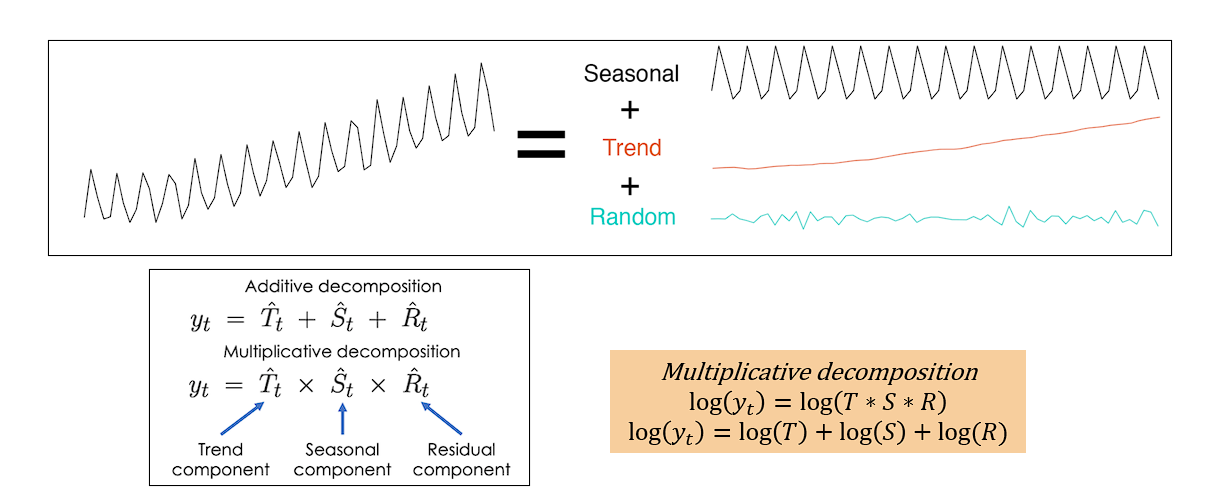

In [44]:
from warnings import filterwarnings
filterwarnings("ignore")

Read the dataset

In [45]:
import pandas as pd
import numpy as np

In [46]:
df=pd.read_csv("AirPassengers.csv",index_col="Month",parse_dates=True)

In [47]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [48]:
df.isna().sum()

#Passengers    0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [50]:
df.columns=["nPass"]

In [51]:
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Visualize the time series data

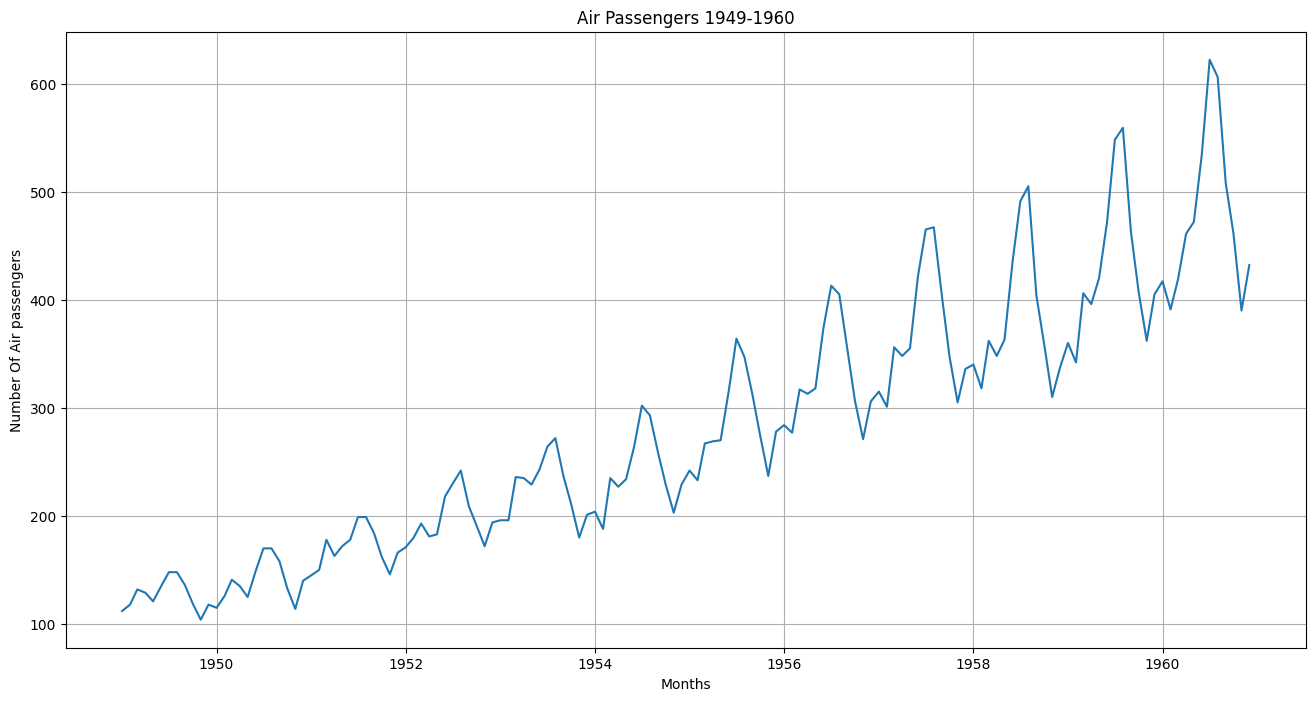

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df["nPass"])
plt.xlabel("Months")
plt.ylabel("Number Of Air passengers")
plt.title("Air Passengers 1949-1960")
plt.grid()
plt.show()

Time series decomposition

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
Q=seasonal_decompose(df["nPass"],model="multiplicative")

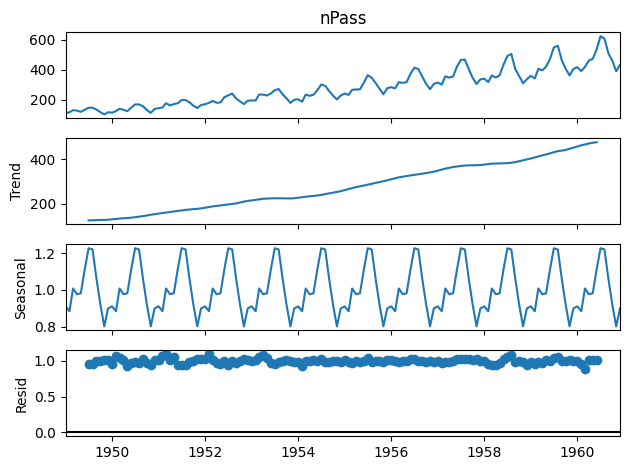

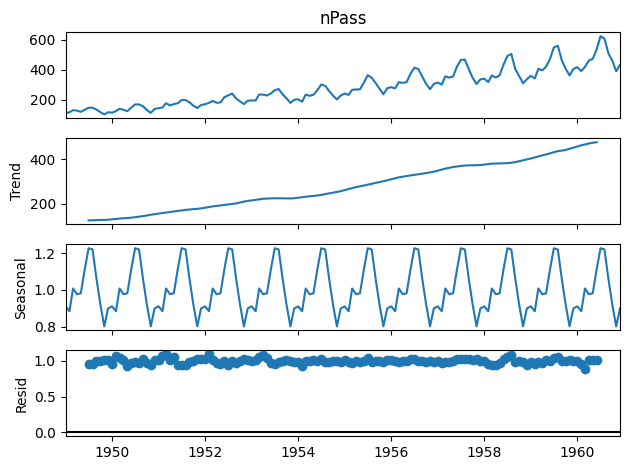

In [55]:
Q.plot()

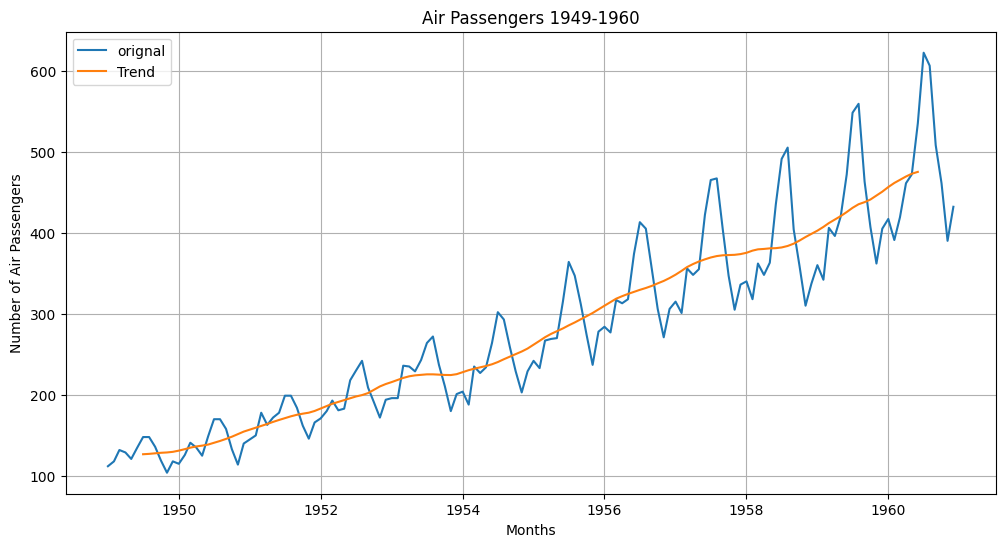

In [56]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(df['nPass'], label='orignal')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Months')
plt.ylabel('Number of Air Passengers')
plt.title('Air Passengers 1949-1960')
plt.grid()
plt.legend()
plt.show()

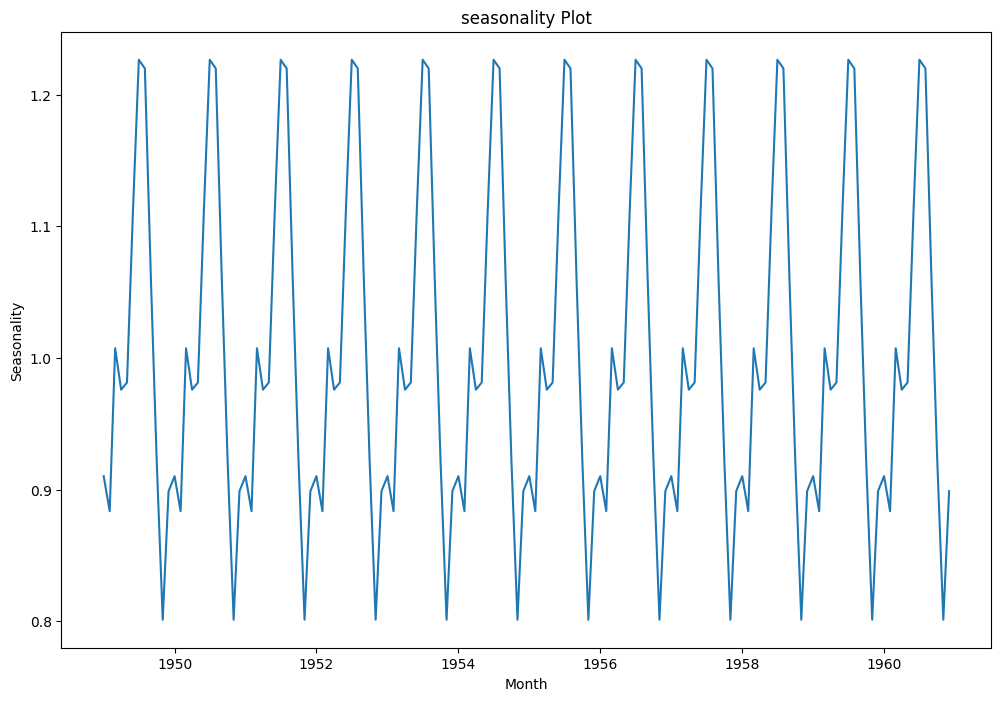

In [57]:
plt.figure(figsize=(12,8))
plt.plot(Q.seasonal)
plt.xlabel("Month")
plt.ylabel("Seasonality")
plt.title("seasonality Plot")
plt.show()

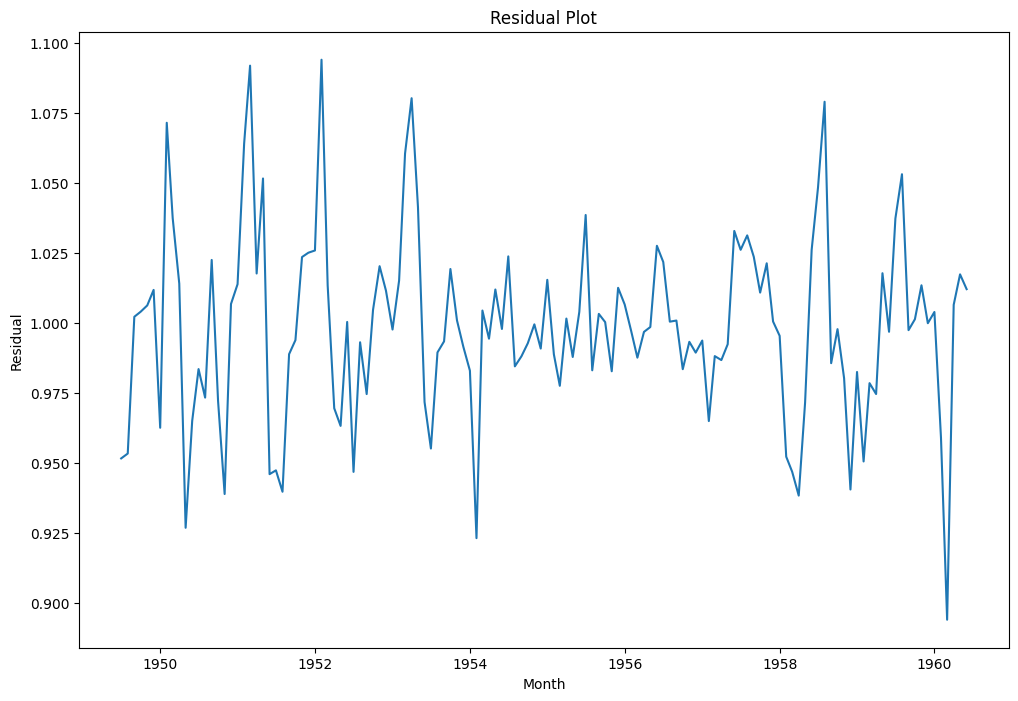

In [58]:
plt.figure(figsize=(12,8))
plt.plot(Q.resid)
plt.xlabel("Month")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

Multiplicative model yt=Trend * Season * Residual

Time Series Prediction

ARIMA -Auto Regression integrated moving average


In [59]:
%pip install pmdarima


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from pmdarima.arima import auto_arima

In [61]:
model=auto_arima(df["nPass"],seasonal=True,n=12)

In [62]:
model.order

(4, 1, 3)

In [63]:
p=model.order[0]
p

4

In [64]:
d=model.order[1]
d

1

In [65]:
q=model.order[2]
q

3

Get forcast for next 3 years

In [66]:
forcast,c_i=model.predict(n_periods=36,return_conf_int=True)

In [67]:
forcast

1961-01-01    467.573833
1961-02-01    490.494617
1961-03-01    509.136997
1961-04-01    492.554809
1961-05-01    495.305983
1961-06-01    475.947801
1961-07-01    476.339830
1961-08-01    475.552134
1961-09-01    472.353835
1961-10-01    483.889694
1961-11-01    475.570222
1961-12-01    485.921567
1962-01-01    479.133655
1962-02-01    480.987460
1962-03-01    482.221424
1962-04-01    476.211055
1962-05-01    483.942840
1962-06-01    475.847387
1962-07-01    482.794289
1962-08-01    479.011992
1962-09-01    479.518670
1962-10-01    482.449481
1962-11-01    476.973982
1962-12-01    483.511050
1963-01-01    477.258791
1963-02-01    481.768972
1963-03-01    479.829683
1963-04-01    478.956114
1963-05-01    482.304332
1963-06-01    477.413108
1963-07-01    482.698399
1963-08-01    478.204380
1963-09-01    480.970151
1963-10-01    480.412687
1963-11-01    478.777179
1963-12-01    482.100094
Freq: MS, dtype: float64

In [68]:
c_i

array([[414.83032398, 520.31734177],
       [401.93701878, 579.05221578],
       [403.59434942, 614.67964414],
       [379.05956444, 606.05005438],
       [380.31232594, 610.29964051],
       [360.28263241, 591.6129703 ],
       [360.27934897, 592.40031024],
       [358.71110605, 592.39316244],
       [353.59772282, 591.10994733],
       [363.17750907, 604.60187808],
       [351.82484703, 599.31559664],
       [360.01440632, 611.82872782],
       [350.91690038, 607.35040867],
       [350.86639735, 611.10852328],
       [350.51004931, 613.93279792],
       [342.5758286 , 609.84628065],
       [348.85975824, 619.02592221],
       [338.7775117 , 612.91726322],
       [344.11543648, 621.47314177],
       [338.51474547, 619.50923889],
       [337.22106556, 621.81627477],
       [338.58728874, 626.31167393],
       [331.23991746, 622.70804689],
       [336.3221541 , 630.69994555],
       [328.28780705, 626.22977426],
       [331.27366031, 632.26428287],
       [327.73784161, 631.92152539],
 

save data in df

In [69]:
df_forcast=forcast.to_frame()
df_forcast.columns=["forcast"]
df_forcast

,forcast
1961-01-01,467.573833
1961-02-01,490.494617
1961-03-01,509.136997
1961-04-01,492.554809
1961-05-01,495.305983
1961-06-01,475.947801
1961-07-01,476.339830
1961-08-01,475.552134
1961-09-01,472.353835
1961-10-01,483.889694


In [70]:
df_forcast["low_ci"]=c_i[:,0]
df_forcast["high_ci"]=c_i[:,1]

In [71]:
df_forcast.head()

,forcast,low_ci,high_ci
1961-01-01,467.573833,414.830324,520.317342
1961-02-01,490.494617,401.937019,579.052216
1961-03-01,509.136997,403.594349,614.679644
1961-04-01,492.554809,379.059564,606.050054
1961-05-01,495.305983,380.312326,610.299641


In [72]:
for i in df_forcast.columns:
    df_forcast[i]=df_forcast[i].apply(round)

In [73]:
df_forcast.head()

,forcast,low_ci,high_ci
1961-01-01,468,415,520
1961-02-01,490,402,579
1961-03-01,509,404,615
1961-04-01,493,379,606
1961-05-01,495,380,610


In [74]:
df_forcast.to_csv("forcast_result.csv",index=True)

Plot result

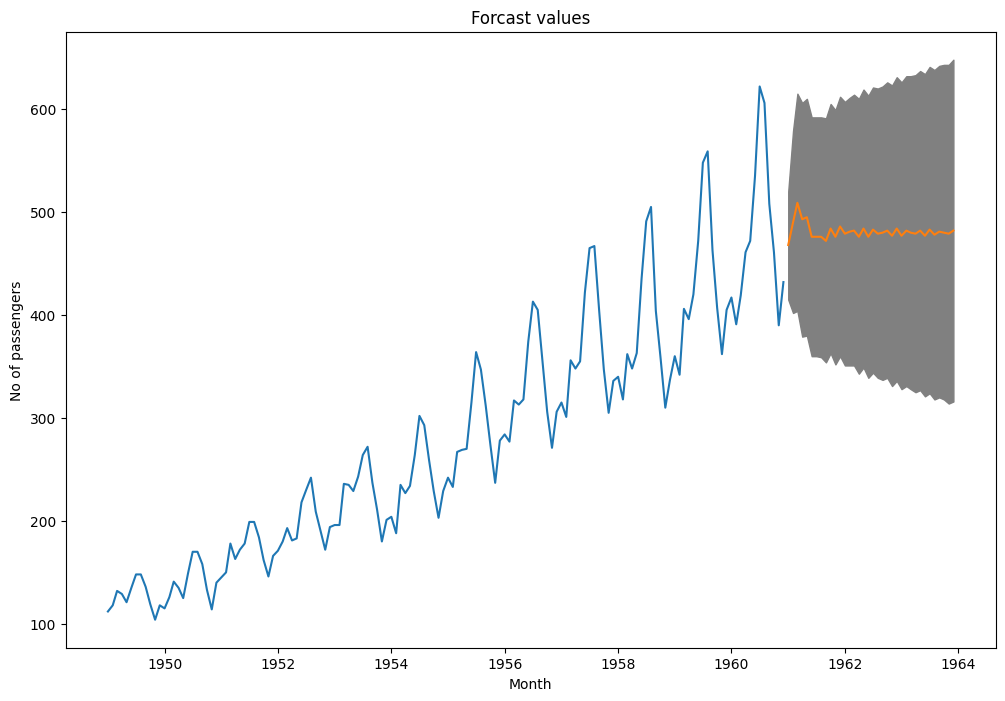

In [75]:
plt.figure(figsize=(12,8))
plt.plot(df["nPass"],label="observed")
plt.plot(df_forcast["forcast"],label="forcast")
plt.fill_between(df_forcast.index,df_forcast["low_ci"],df_forcast["high_ci"],color="grey",label="Confidence Interval")
plt.xlabel("Month")
plt.ylabel("No of passengers")
plt.title("Forcast values")
plt.show()